In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Let's try boxplots
In order to draw a boxplot we need to use df['column(s) of interest'].plot(kind = 'box')

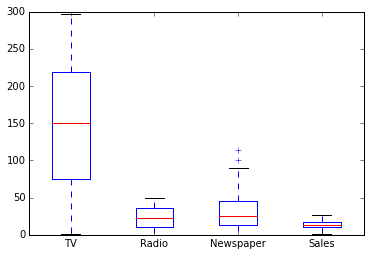

In [3]:
# Your boxplots
data.plot(kind = 'box')

#### What do we learn from TV, Radio, Newspaper and Sales Box-plots?

Answer: TV and Radio are symmetrically distributed with no outliers. 
        NewsPaper is roughly symmetric but seems to have two outliers.
        Sales Variable does not have any outliers but seems to be Skewed to the right.

# Let's play with correlation

Find Correlations Matrix of your data and explain what you've learned from it. For instance, which variable can depict Sales the best? (TV, Radio or Newspaper). What is the highest and lowest correlation?  
hint: df.corr() returns Matrix of correlation


In [4]:
# your Corrolation code shall be written here:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What did you learn from correlation Matrix?
Answer: (TV is almost not correlated with Radio and Newspaper adds. It has significant correlation with Sales. Perhaps TV is the best predictor of Sales. 

# Let's get rid of outliers.

First: Look over your box-plots and pick one variable that likely has outliers.

Second: Find Interquartile Range (IQR) of that variable. You can do this in two different ways. 
    - Use df.describe()
    - Use df.quantile()
Third: Remember, one definition of outliers is anything that is more than 1.5*IQR above Q3 or 1.5QR below Q1 (For this example solely focus on 1.5*IQR above Q3)
Fourth: delete the outlier rows.

#### Which Variable seems to have outliers?

Answer: It seems like Newspaper is the only variable with outliers. 2 outliers are visible from its BoxPlot

In [5]:
# Before you start check how many observations are in your DataFrame
len(data) #There are 200 observations in our data.

200

In [5]:
#Step 2 Let's find IQR
Q1 = data.Newspaper.quantile(0.25)
Q3 = data.Newspaper.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

32.35


In [6]:
data.drop(data[data['Newspaper'] > (Q3 + 1.5*IQR)].index, inplace = True)

In [7]:
# Check the length of your data and see if you have correctly dropped outliers.
len(data)  #we have 198 observations now! 

198

In [8]:
data.to_csv("AdvertisingCleaned")

# Your last mission!

Our goal is to divide our dataset to High Sales and Low Sales. We would like to add a dummy variable called Sales_Dummy which is 0 if Sales of that specific observation is less than Median of all Sales and is 1 if sales is more than median of Sales.

In [9]:
"""
We can do it in shorter steps - but for education purposes, first define a variable called 
SalesCategory which is Low when Sales is less than Median and High otherwise. 
"""
mask_High = (data['Sales'] > data['Sales'].median())
data['SalesCategory'] = 'Low'
data.loc[mask_High,'SalesCategory'] = 'High'

In [10]:
"""
We can define a new Variable called SalesDummy that serves our purpose. Let's call our
Dummy Variable, Sales_Dummy. Please use .map()
"""
data['Sales_Dummy'] = data.SalesCategory.map({'Low':0, 'High':1})
data.head()

,TV,Radio,Newspaper,Sales,SalesCategory,Sales_Dummy
1,230.1,37.8,69.2,22.1,High,1
2,44.5,39.3,45.1,10.4,Low,0
3,17.2,45.9,69.3,9.3,Low,0
4,151.5,41.3,58.5,18.5,High,1
5,180.8,10.8,58.4,12.9,Low,0
